#### DATE

#### NAME

#### YEAR-DIVISION

#### ROLL NO.

#### SUBJECT

#### ASSIGNMENT NO.

#### PROBLEM STATEMENT

#### Importing Necessary Packages And Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.losses import MeanSquaredError

#### Attribute Information (in order) :

#### Load The Dataset

In [2]:
df = pd.read_csv('Boston_house_Pricing_data.csv')

#### Display the first few rows of the Dataset

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Split the data into input and output variables 

In [4]:
x = df.drop('MEDV', axis = 1)
y = df[['MEDV']]

#### Scale the input features

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

#### Check the attributes in the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Split the Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Print the shapes of the training and testing sets 

In [8]:
print('Training set shape:', X_train.shape, y_train.shape) 
print('Testing set shape:', X_test.shape, y_test.shape) 

Training set shape: (354, 13) (354, 1)
Testing set shape: (152, 13) (152, 1)


#### Define the model architecture 

In [10]:
model = Sequential() 
model.add(Dense(64,input_dim=13,activation='relu'))  
model.add(Dropout(0.2)) 
model.add(Dense(32,activation='relu')) 
model.add(Dense(1)) 

#### Display the model summary

In [11]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None


#### Compile the model

In [12]:
model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=['mean_absolute_error'])

#### Train the model 

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5) 
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
                    callbacks=[early_stopping])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1516.8102 - mean_absolute_error: 31.3304 - val_loss: 585.8851 - val_mean_absolute_error: 22.7206
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 639.9026 - mean_absolute_error: 23.2846 - val_loss: 584.1869 - val_mean_absolute_error: 22.6832
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 603.6527 - mean_absolute_error: 22.7593 - val_loss: 582.3401 - val_mean_absolute_error: 22.6425
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 599.4931 - mean_absolute_error: 22.7132 - val_loss: 580.4728 - val_mean_absolute_error: 22.6012
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 646.6716 - mean_absolute_error: 23.3723 - val_loss: 578.5926 - val_mean_absolute_error: 22.5596
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 632.8198 - mean_absolute_error: 23.1102 - val_loss: 576.7438 - val_mean_absolute_error: 22.5186
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 626.6246 - mean_absolut

#### Plot the training and validation loss over epochs 

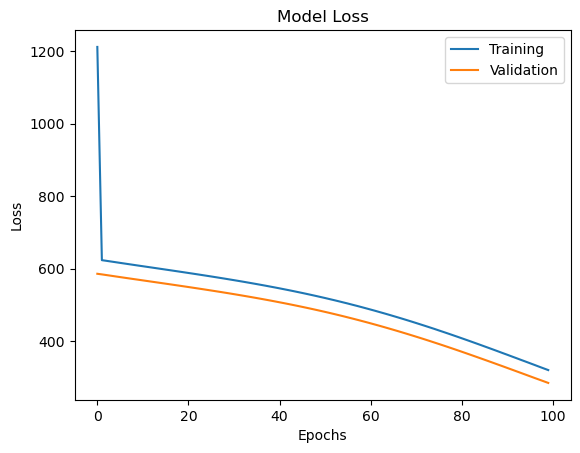

In [14]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training', 'Validation']) 
plt.show()

#### Evaluate the model on the testing set loss

In [15]:
 mae = model.evaluate (X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 245.3791 - mean_absolute_error: 13.3395


#### Print the mean absolute error 

In [16]:
print('Mean Absolute Error:', mae) 

Mean Absolute Error: [252.0478057861328, 13.393306732177734]
